In [3]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

In [115]:
# Q2

# Reading data from the given .csv file
data_obj = pd.read_csv('housing.csv')
df = pd.DataFrame(data_obj)

# Number of rows and columns
rows, cols = df.shape
print(f'Number of rows: {rows}')
print(f'Number of cols: {cols} \n')

# Contents
print(data_obj)

Number of rows: 20640
Number of cols: 10 

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       p

In [117]:
# Q3 - Descriptive statistics of the given DataFrame including min, max, mean, median, standard deviation
data_obj.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [127]:
# Q5

# Columns which have missing values
print("Columns which have missing values:\n", data_obj.isnull().any())
#The column with the missing value will present the output as True.
# Number of tuples which have missing values
print("\n Number of tuples which have missing values:\n", data_obj.isnull().sum())

Columns which have missing values:
 longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

 Number of tuples which have missing values:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


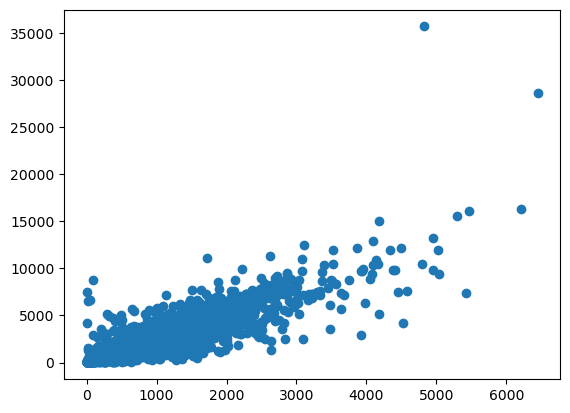

In [129]:
# Q6 - Plotting total_bedrooms vs population BEFORE filling in the nan values with the mean
plt.scatter(data_obj.total_bedrooms, data_obj.population)

In [133]:
# Q5 - Imputing the missing values with the mean

total_bedroom_mean = np.mean(data_obj.total_bedrooms)
total_bedroom_mean

537.8705525375617

In [135]:
data_obj.total_bedrooms.fillna(value = total_bedroom_mean, inplace = True)

C:\Users\yashk\AppData\Local\Temp\ipykernel_4600\2523382579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_obj.total_bedrooms.fillna(value = total_bedroom_mean, inplace = True)


In [205]:
#Checking the presence of any nan values after imputing missing values with mean
data_obj.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

All nan values successfully replaced with mean

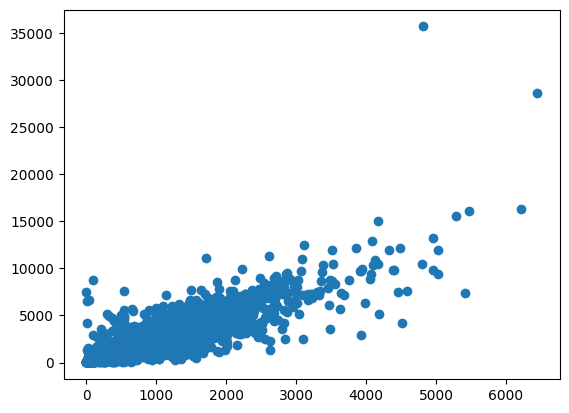

In [206]:
# Plotting total_bedrooms vs population AFTER filling in the nan values with the mean
plt.scatter(data_obj.total_bedrooms, data_obj.population)

In [207]:
# Q7

# Dropping duplicates
data_obj.drop_duplicates(inplace= True)

In [208]:
data_obj

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [209]:
# As the number of rows and columns remains unchanged, there seem to be no duplicates.

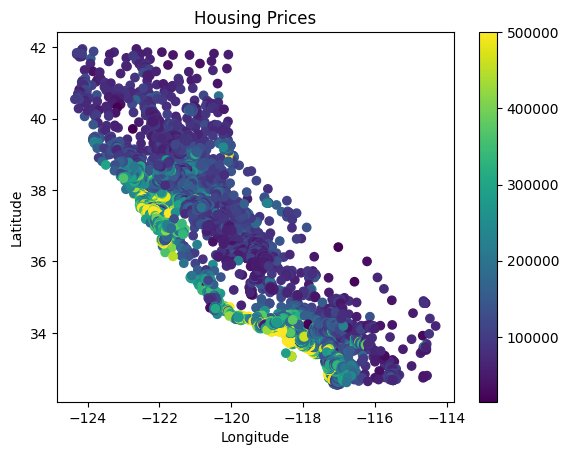

In [210]:
#Q8

#Using Matplotlib and generating a scatter plot, between latitude and longitude.
plt.scatter(data_obj.longitude , data_obj.latitude, c = data_obj.median_house_value)
plt.title('Housing Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.colorbar()

plt.show()

In [38]:
#Q9

#Trying to make some observations from the DataFrame.
dq = data_obj.query('housing_median_age	<= 10 and median_house_value >= 264725.000000 and ocean_proximity == "<1H OCEAN"')

In [40]:
dq

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
863,-122.00,37.58,6,4405,717.0,2071,688,5.8151,295600,<1H OCEAN
870,-121.93,37.49,5,1150,311.0,648,245,3.5714,300000,<1H OCEAN
922,-121.92,37.53,7,28258,3864.0,12203,3701,8.4045,451100,<1H OCEAN
923,-121.89,37.49,9,4909,577.0,1981,591,9.7194,500001,<1H OCEAN
946,-121.92,37.72,4,7477,1576.0,2937,1506,5.1437,299400,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20440,-118.77,34.24,6,16222,2309.0,6700,2080,6.4963,308100,<1H OCEAN
20450,-118.91,34.28,6,6106,1134.0,3246,1062,5.2206,280200,<1H OCEAN
20451,-118.90,34.26,5,25187,3521.0,11956,3478,6.9712,321300,<1H OCEAN
20487,-118.67,34.30,5,6123,825.0,2440,736,7.9013,393000,<1H OCEAN


Text(0.5, 1.0, 'Plot of relatively newer houses (<=10y) that are close to the ocean and in the top 25%ile in terms of pricing')

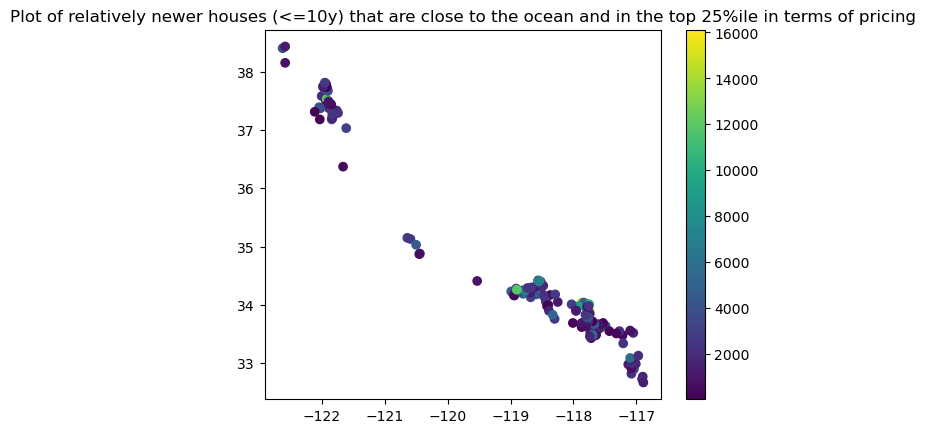

In [42]:
#Plotting the observations we made.

plt.scatter(dq.longitude, dq.latitude, c= dq.population)
plt.colorbar()
plt.title('Plot of relatively newer houses (<=10y) that are close to the ocean and in the top 25%ile in terms of pricing')

In [214]:
#Q10
#Performing exploratory data analysis.
grouped = data_obj.groupby('ocean_proximity') 
#encoding the values into labels. 
ocean_proximity_le = LabelEncoder() 
data_obj.ocean_proximity = ocean_proximity_le.fit_transform(data_obj.ocean_proximity)

In [215]:
data_obj

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1


In [216]:
# Exploratory data analysis by (on subgroups): 

In [217]:
df_1 = data_obj.query('ocean_proximity == "<1H OCEAN"')
df_1.describe()
#HOUSES WITH A PROXIMITY OF <1H FROM THE OCEAN

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


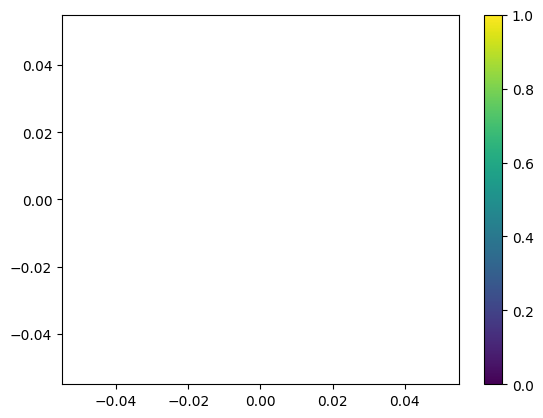

In [218]:
#Plotting the data
plt.scatter(df_1.longitude, df_1.latitude, c = df_1.median_house_value)
plt.colorbar()

In [219]:
df_2 = data_obj.query('ocean_proximity == "INLAND"')
df_2.describe()
# INLAND HOUSES

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


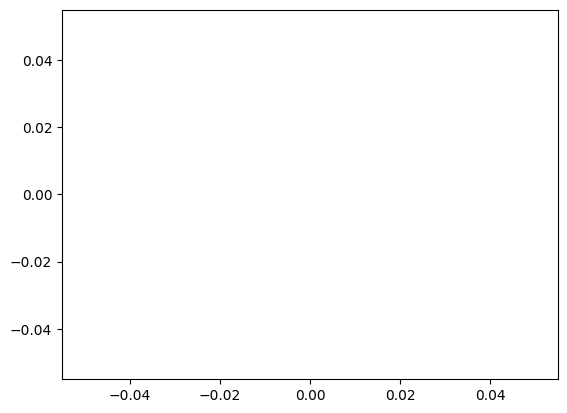

In [220]:
plt.scatter(df_2.longitude, df_2.latitude)

In [221]:
df_3 = data_obj.query('ocean_proximity == "NEAR OCEAN"')
df_3.describe()
#HOUSES NEAR THE OCEAN

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


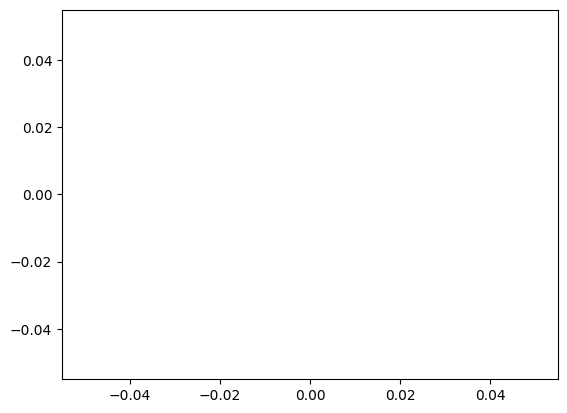

In [222]:
plt.scatter(df_3.longitude, df_3.latitude)

In [223]:
data = data_obj
#grouping the given DataFrame according to ‘ocean_proximity. 
grouped = data.groupby('ocean_proximity') 
#encoding the values into labels. 
ocean_proximity_le = LabelEncoder() 
data['ocean_proximity'] = ocean_proximity_le.fit_transform(data['ocean_proximity'])

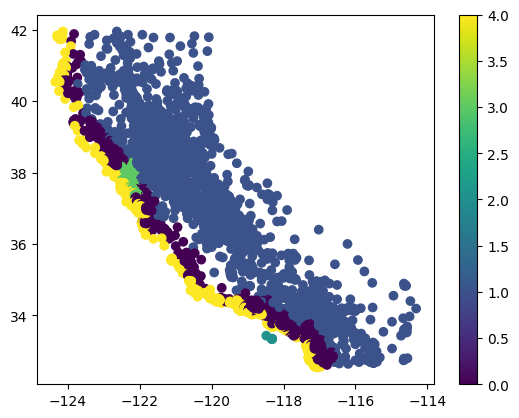

In [224]:
plt.scatter(data.longitude, data.latitude, c = data.ocean_proximity)
plt.colorbar()

In [225]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1


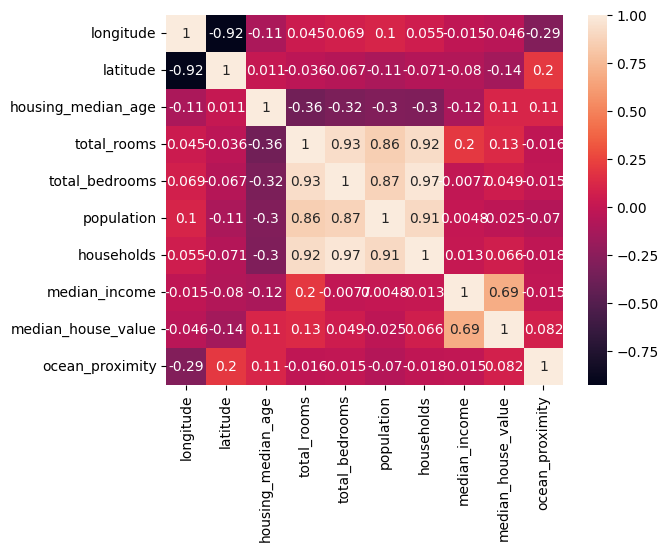

In [226]:
#Q11

#Creating a heatmap to show the correlation.
sns.heatmap(data.corr(), annot = True)
plt.show()
# SLOPE HEAVY

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'longitude'),
  Text(1, 0, 'latitude'),
  Text(2, 0, 'housing_median_age'),
  Text(3, 0, 'total_rooms'),
  Text(4, 0, 'total_bedrooms'),
  Text(5, 0, 'population'),
  Text(6, 0, 'households'),
  Text(7, 0, 'median_income'),
  Text(8, 0, 'median_house_value'),
  Text(9, 0, 'ocean_proximity')])

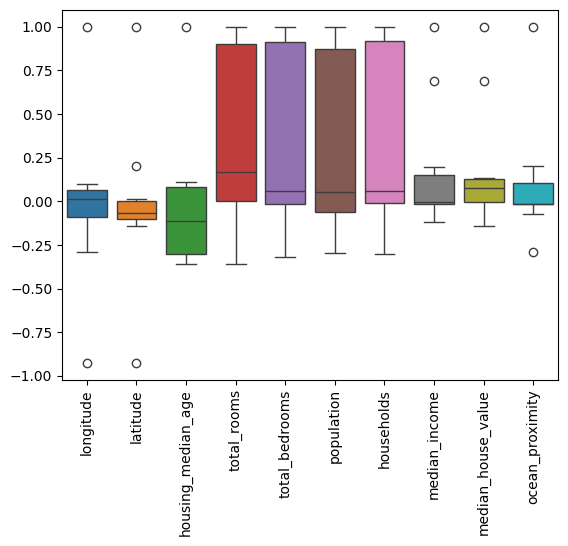

In [227]:
#Generating the box plots for the same.
sns.boxplot(data.corr())
plt.xticks(rotation = 90)

11.C,D
12
13
14 remaining

In [228]:
#Analysing the heatmap and box plot.
data_obj.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [229]:
x_75 = data_obj.median_house_value.quantile(0.90)

In [230]:
data_premium = data_obj.query(f'median_house_value >= {x_75}')

In [231]:
data_premium

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
89,-122.27,37.80,52,249,78.0,396,85,1.2434,500001,3
123,-122.24,37.84,52,3529,574.0,1177,555,5.1773,389500,3
124,-122.24,37.85,52,2612,365.0,901,367,7.2354,391100,3
128,-122.21,37.83,40,4991,674.0,1616,654,7.5544,411500,3
...,...,...,...,...,...,...,...,...,...,...
20436,-118.69,34.21,10,3663,409.0,1179,371,12.5420,500001,0
20438,-118.79,34.26,17,1986,249.0,761,241,7.2137,401900,0
20442,-118.78,34.25,13,1841,237.0,833,231,7.7785,404700,0
20443,-118.85,34.27,50,187,33.0,130,35,3.3438,500001,0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'longitude'),
  Text(1, 0, 'latitude'),
  Text(2, 0, 'housing_median_age'),
  Text(3, 0, 'total_rooms'),
  Text(4, 0, 'total_bedrooms'),
  Text(5, 0, 'population'),
  Text(6, 0, 'households'),
  Text(7, 0, 'median_income'),
  Text(8, 0, 'median_house_value'),
  Text(9, 0, 'ocean_proximity')])

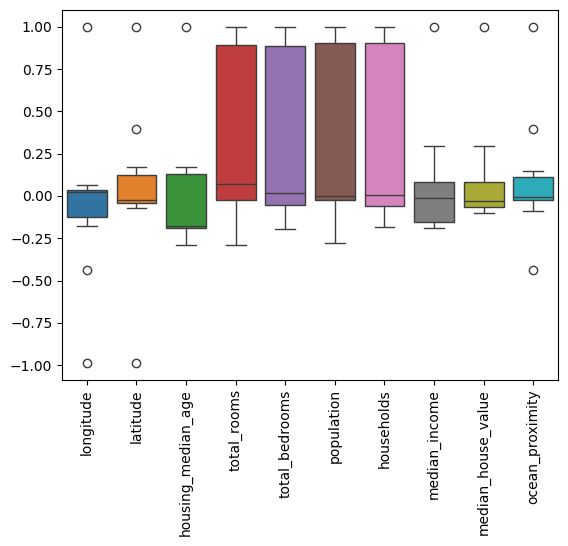

In [233]:
# Premium house boxplot
sns.boxplot(data_premium.corr())
plt.xticks(rotation = 90)

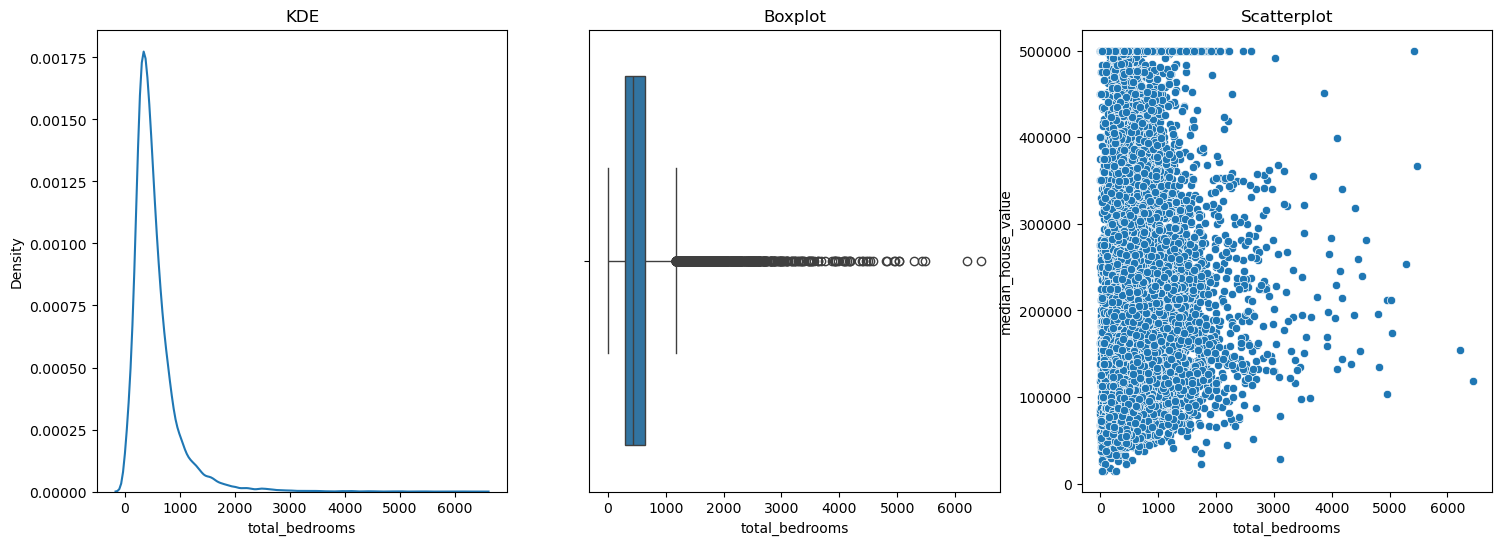

In [88]:
# Q12 - creating a figure with 3 subplots

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
df1 = pd.DataFrame(data_obj)
column = 'total_bedrooms'

# First subplot - KDE of total_bedrooms
sns.kdeplot(data=df1, x=column, ax=axes[0])
axes[0].set_title('KDE');

# Second subplot - Boxplot of total_bedrooms
sns.boxplot(data=df1, x=column, ax=axes[1])
axes[1].set_title('Boxplot');

# Third subplot - Scatterplot of total_bedrooms vs median_house_value
sns.scatterplot(data=df1, x=column, y='median_house_value', ax=axes[2])
axes[2].set_title('Scatterplot');

60.81996944469873 139.13702181872642
Number of outliers =  51 



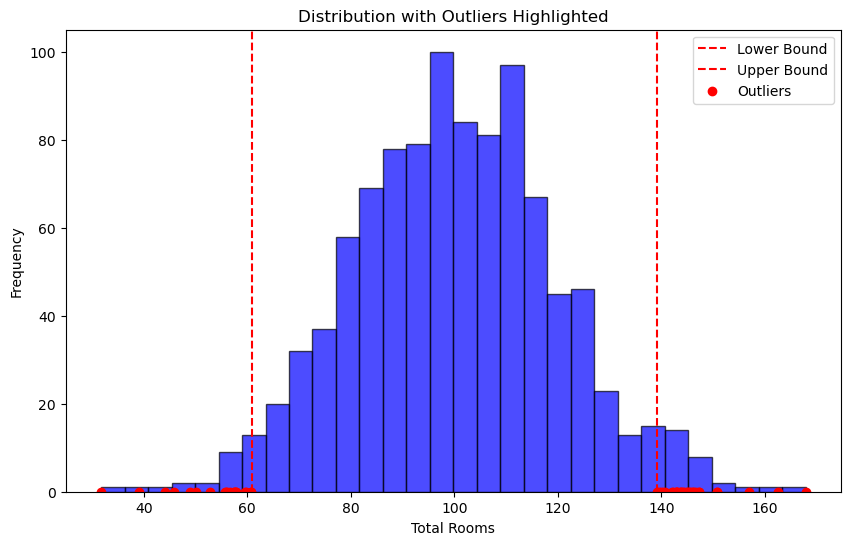

In [90]:
# Q13 - Outliers

# Replace colName with whichever attribute you want to find outliers in
colName = 'total_rooms'
data = {colName: np.random.normal(loc=100, scale=20, size=1000)}
df = pd.DataFrame(data)
meanVal = df[colName].mean()
stdDev = df[colName].std()

# Lower and upper bound values using two standard deviations from the mean
lowerBound = meanVal - 2*stdDev
upperBound = meanVal + 2*stdDev
print(lowerBound, upperBound)

# Data points that lie outside these bounds as outliers:
outliers = df[(df[colName] < lowerBound) | (df[colName] > upperBound)]
# print("\nOutliers: \n", outliers, "\n")

# Number of outliers:
print("Number of outliers = ", len(outliers), "\n")

# Visual representation:
plt.figure(figsize=(10, 6))
plt.hist(df[colName], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(lowerBound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upperBound, color='red', linestyle='--', label='Upper Bound')
# Highlighting outliers
plt.scatter(outliers[colName], [0] * len(outliers), color='red', marker='o', label='Outliers')
plt.title('Distribution with Outliers Highlighted')
plt.xlabel('Total Rooms')
plt.ylabel('Frequency')
plt.legend()
plt.show()